# Sistema iterado : Hoja de Barnsley (*Barnsley's fern*)

Un sistema iterado muy famoso que posee dimensión fractal es la *hoja de Barnsley*. La teoría matemática subyacente esta relacionada con las transformaciones conformes, y mediante la selección de diferentes conjuntos de parámetros de acuerdo a un conjunto de probabilidades es posible obtener una hoja fractal
La transformación en cuestión es de la forma

$$ \left(x_{n+1},y_{n+1}\right) = f(x_{n},y_{n}) $$

Donde

$$f(x_{n},y_{n}) = \begin{bmatrix}a & b \\ c & d \end{bmatrix} \begin{bmatrix} x_{n} \\ y_{n} \end{bmatrix} + \begin{bmatrix} e \\ f \end{bmatrix}$$

Que es equivalente a tener el conjunto de ecuaciones

$$
\begin{eqnarray}
x_{n+1} &=& a\,x_{n} + b\,y_{n} + e \\
y_{n+1} &=& c\,x_{n} + d\,y_{n} + f
\end{eqnarray}
$$

Esto se conoce como un sistema iterado, pues cada pareja de puntos $(x_{n+1},y_{n+1})$ de la secuencia, depende de los puntos precedentes $(x_{n},y_{n})$.

Utilizando el conjunto de transformaciones,

$$
\begin{eqnarray}
f_{1}(x,y) &=& \begin{bmatrix} \ 0.00 & \ 0.00 \ \\ 0.00 & \ 0.27 \end{bmatrix} \begin{bmatrix} \ x \\ y \end{bmatrix} + \begin{bmatrix} \ 0.50 \\ 0.00 \end{bmatrix}\\
f_{2}(x,y) &=& \begin{bmatrix} \ -0.139 & \ 0.263 \ \\ 0.246 & \ 0.224 \end{bmatrix} \begin{bmatrix} \ x \\ y \end{bmatrix} + \begin{bmatrix} \ 0.57 \\ -0.036 \end{bmatrix}\\
f_{3}(x,y) &=& \begin{bmatrix} \ 0.17 & \ -0.2150 \ \\ 0.2220 & \ 0.160 \end{bmatrix} \begin{bmatrix} \ x \\ y \end{bmatrix} + \begin{bmatrix} \ 0.408 \\ 0.0893 \end{bmatrix}\\
f_{4}(x,y) &=& \begin{bmatrix} \ 0.7810 & \ 0.0340 \ \\ -0.0320 & \ 0.7390 \end{bmatrix} \begin{bmatrix} \ x \\ y \end{bmatrix} + \begin{bmatrix} \ 0.1075 \\ 0.27 \end{bmatrix} 
\end{eqnarray}
$$

Eligiendo una función $f_{i}(x,y)$ de acuerdo a una distribución de probabilidad es posible obtener una secuencia de $N$ parejas de puntos

$$\left\{ (x_{i},y_{i}) \right\}_{i=0}^{N}$$

Los cuales podemos graficar obteniendo una hoja fractal.  
El código siguiente genera dicha hoja utilizando la transformación sugerida, sin embargo, es posible utilizar otro conjunto de parametros que genere una hoja diferente

In [3]:
import random

# Esta función se encarga de hacer las iteraciones
def iterar(coordenadas,parametros_A,parametros_b):
    resultado=[0,0]
    for i in range(0,len(coordenadas)):
        resultado[i] += parametros_b[i]
        for j in range(0,len(parametros_A[i])):
            resultado[i]+=parametros_A[i][j]*coordenadas[j]
    return resultado

# Esta función se encarga de cambiar la matriz de la transformación de Barnsley
def variarParametros():
    parametros_b = [0.0,0.0]
    matriz_resultado  = [[0,0],[0,0]];
    rand = random.random()
    if (rand < 0.02):
        matriz_resultado[0][0] = 0
        matriz_resultado[0][1] = 0
        matriz_resultado[1][0] = 0
        matriz_resultado[1][1] = 0.27
        parametros_b[0] = 0.5
        parametros_b[1] = 0
        return matriz_resultado, parametros_b
    if  ((0.02 <= rand) and (rand <= 0.17)):
        matriz_resultado[0][0] = -0.139
        matriz_resultado[0][1] = 0.263
        matriz_resultado[1][0] = 0.246
        matriz_resultado[1][1] = 0.224
        parametros_b[0] = 0.57
        parametros_b[1] = -0.036
        return matriz_resultado, parametros_b
    if  ((0.17 < rand) and (rand <= 0.3)):
        matriz_resultado[0][0] = 0.17
        matriz_resultado[0][1] = -0.2150
        matriz_resultado[1][0] = 0.2220
        matriz_resultado[1][1] = 0.160
        parametros_b[0] = 0.408
        parametros_b[1] = 0.0893
        return matriz_resultado, parametros_b
    if ((0.3 < rand) and (rand < 1.0)):
        matriz_resultado[0][0] = 0.7810
        matriz_resultado[0][1] = 0.0340
        matriz_resultado[1][0] = -0.0320
        matriz_resultado[1][1] = 0.7390
        parametros_b[0] = 0.1075
        parametros_b[1] = 0.27
        return matriz_resultado, parametros_b


coordenadas_n = [0,0];
matriz_A   = [[0.2,-0.1],[0.4,0.2]];
parametros_b = [0.57,0.036]
coordenadas_n_1 = [0,0]

# Aquí almacenaremos los valores de los puntos x,y en una lista cada uno
puntos_x=[]
puntos_y=[]

for i in range(0,50000):
    coordenadas_n_1 = iterar(coordenadas_n,matriz_A,parametros_b)
    matriz_A, parametros_b =  variarParametros()
    puntos_x.append(coordenadas_n[0])
    puntos_y.append(coordenadas_n[1])
    coordenadas_n = coordenadas_n_1


Para poder ver la hoja generada en memomoria es necesario graficar los puntos almacenados en las listas `puntos_x` y `puntos_y`

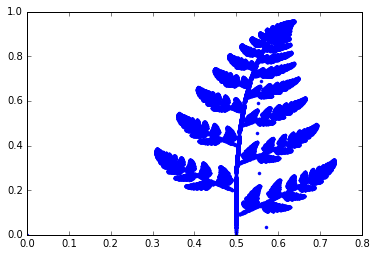

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(puntos_x,puntos_y,".")
plt.show()